# Question
* Write an R‐script (or Python) to create multiple linear regression analysis of “mtcars” data (if using R, “mtcars” is available in “datasets” package), then create a model to predict mpg (miles per gallon) using best variable(s) available.
* Explain the diagnostic tests and make a conclusion about the model! 

In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

import numpy as np
%matplotlib inline

In [2]:
dataset = pd.read_csv("./datasets/mtcars.csv").rename(columns={'Unnamed: 0':'name'})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


# Data Definitions:

<table class="table table-condensed">
<colgroup>
<col width="4%">
<col width="6%">
<col width="25%">
<col width="64%">
</colgroup>
<thead>
<tr class="header">
<th align="left">#</th>
<th align="left">Var</th>
<th align="left">Description</th>
<th align="left">Comments</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left">0</td>
<td align="left">name</td>
<td align="left">Model of Vehicle</td>
<td align="left">The car types are a mix that includes sedans (Datsun, Ford, Honda,…), luxury sedans (Mercedes, Cadellac,..), muscle cars (Javelin, Challenger, Camero…) and high-end sports cars (Porsche, Lotus, Maserati, Ferrari…)</td>
</tr>
<tr class="even">
<td align="left">1</td>
<td align="left">mpg</td>
<td align="left">Miles/US Gallon</td>
<td align="left">mpg is the determinant of fuel efficiency</td>
</tr>
<tr class="odd">
<td align="left">2</td>
<td align="left">cyl</td>
<td align="left">Number of cylinders</td>
<td align="left">Data includes vehicles with 4,6,8 cylinder engines.</td>
</tr>
<tr class="even">
<td align="left">3</td>
<td align="left">disp</td>
<td align="left">Displacement (cu.in.)</td>
<td align="left">Displacement measures overall volume in the engine as a factor of cylinder circumfrance, depth and total number of cylinders. This metric gives a good proxy for the total amount of power the engine can generate.</td>
</tr>
<tr class="odd">
<td align="left">4</td>
<td align="left">hp</td>
<td align="left">Gross horsepower</td>
<td align="left">Gross horsepower measures the theoretical output of an engine’s power output; notably, <em>gross</em> rating is of the engine in an isolated environment outside any specific vehicle. When installed in a car, exhaust systems, carburetor, alternator, power systems, etc all influence the power that actually gets to the drive train. Moreover, according to online sources, in the early 1970s, regulatory changes influenced how gross horsepower was measured. As this dataset is from the early-mid 1970s, it’s unclear if hp metrics may be used as reliable comparators of engine power across models as it’s uncertain how manufacturers are reporting.</td>
</tr>
<tr class="even">
<td align="left">5</td>
<td align="left">drat</td>
<td align="left">Rear axle ratio</td>
<td align="left">The rear axle gear ratio indicates the number of turns of the drive shaft for every one rotation of the wheel axle. A vehicle with a high ratio would provide more torque and thus more towing capability, for example. Transmission configuration can often influence a manufacturer’s gearing ratio.</td>
</tr>
<tr class="odd">
<td align="left">6</td>
<td align="left">wt</td>
<td align="left">Weight (lb/1000)</td>
<td align="left">The overall weight of the vehicle per 1000lbs (half US ton)</td>
</tr>
<tr class="even">
<td align="left">7</td>
<td align="left">qsec</td>
<td align="left">1/4 mile time</td>
<td align="left">A performance measure, primarily of acceleration. Fastest time to travel 1/4 mile from standstill (in seconds).</td>
</tr>
<tr class="odd">
<td align="left">8</td>
<td align="left">vs</td>
<td align="left">V/S</td>
<td align="left">Binary variable signaling the engine cylinder configuration a V-shape (vs=0) or Straight Line (vs=1). V==0 and S==1. Configuration offers trade offs in power/torque, design usage in terms of space/size of engine and performance or center of gravity of vehicle. The geometry and placement of the engine, as influenced by its cylinder head, can have numerous knock-on influences on the vehicle beyond the technical engineering considerations of the cyliner angle.</td>
</tr>
<tr class="even">
<td align="left">9</td>
<td align="left">am</td>
<td align="left">Transmission Type</td>
<td align="left">A binary variable signaling whether vehicle has automatic (am=0) or manual (am=1) transmission configuration.</td>
</tr>
<tr class="odd">
<td align="left">10</td>
<td align="left">gear</td>
<td align="left">Number of forward gears</td>
<td align="left">Number of gears in the transmission. Manual transmissions have either 4 or 5 forward gears; Automatic either 3 or 4</td>
</tr>
<tr class="even">
<td align="left">11</td>
<td align="left">carb</td>
<td align="left">Number of carburetors</td>
<td align="left">The number of carburetor barrels. Engines with higher displacement typically have higher barrel configuration to accomodate the increased airflow rate of the larger engine; in other words, more capacity is available for an engine when it may need it versus constraining power output with limited barrels. A vehicle may have multiple physical carburetors, but it’s less common; this metric is the sum of the number of carburetors and the number of barrels inside the carburetor.</td>
</tr>
</tbody>
</table>

[**References**](https://rstudio-pubs-static.s3.amazonaws.com/61800_faea93548c6b49cc91cd0c5ef5059894.html#:~:text=Table%3A%20Discussion%20of%20mtcars%20variables)

Observations:
Based on the data definitions, we can note that some variables have dependency with other variables:
* Transmission Type `am` with Number of Forward Gears `gear`.
* Transmission Type `am` with Rear Axle Ratio `drat`

# Exploratory Data Analysis
Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

In [3]:
# Knowing car's model name not required during analysis
df = dataset.copy()
df.drop(columns='name', inplace=True)

In [4]:
print(df.shape)
df.info()

(32, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


## Missing or Duplicated Data

In [5]:
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df.isna().sum()

Shape of dataframe: (32, 11)
Shape of dataframe with duplicates dropped: (32, 11)
Total count of missing values: 0
Missing values per column:


mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

**Result**: No duplicates value or missing data

## Data Type


Check if the integer columns can be considered as a discrete/ordinal/boolean.

In [6]:
for col in df.keys():
    if df[col].dtype == 'int':
        unique_values = df[col].unique()
        print(f'Column "{col}" has {len(unique_values)} unique values: ', sorted(set(unique_values)))

Column "cyl" has 3 unique values:  [4, 6, 8]
Column "hp" has 22 unique values:  [52, 62, 65, 66, 91, 93, 95, 97, 105, 109, 110, 113, 123, 150, 175, 180, 205, 215, 230, 245, 264, 335]
Column "vs" has 2 unique values:  [0, 1]
Column "am" has 2 unique values:  [0, 1]
Column "gear" has 3 unique values:  [3, 4, 5]
Column "carb" has 6 unique values:  [1, 2, 3, 4, 6, 8]


Checking above, it is safe to say that .
1. `cyl`, `gear`, and `carb` can are ordinal values.
2. `hp` is continuous by value.
3. `vs` and `am` are boolean columns. 


Let's convert columns on number 2 and 3 to right data type:

In [7]:
df['hp'] = df['hp'].astype('float')
df['vs'] = df['vs'].astype('bool')
df['am'] = df['am'].astype('bool')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     float64
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     bool   
 8   am      32 non-null     bool   
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: bool(2), float64(6), int64(3)
memory usage: 2.4 KB


In [8]:
target_col = 'mpg'
independent_col = [col for col in df.columns if col != target_col]
independent_col

['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

In [9]:
print(df.shape)
df.info()

(32, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     float64
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     bool   
 8   am      32 non-null     bool   
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: bool(2), float64(6), int64(3)
memory usage: 2.4 KB


## Outliers

Since all we can assure that all non-decimal columns are not containing any extreme values, we can focus on all decimal colums. 
### Descriptive Statistics

In [10]:
df.select_dtypes(include=['float']).describe()

,mpg,disp,hp,drat,wt,qsec
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,20.090625,230.721875,146.687500,3.596563,3.217250,17.848750
std,6.026948,123.938694,68.562868,0.534679,0.978457,1.786943
min,10.400000,71.100000,52.000000,2.760000,1.513000,14.500000
25%,15.425000,120.825000,96.500000,3.080000,2.581250,16.892500
50%,19.200000,196.300000,123.000000,3.695000,3.325000,17.710000
75%,22.800000,326.000000,180.000000,3.920000,3.610000,18.900000
max,33.900000,472.000000,335.000000,4.930000,5.424000,22.900000


Observations:
* Looking at the interval of Q3 to Q4/max compared to Q2, there's a possibility of outliers detected in all columns observed


### Boxplot

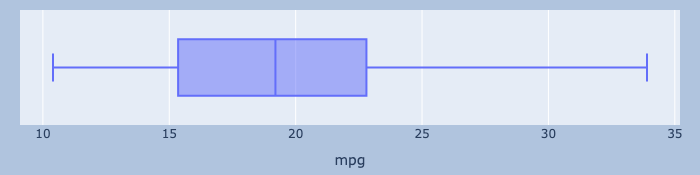

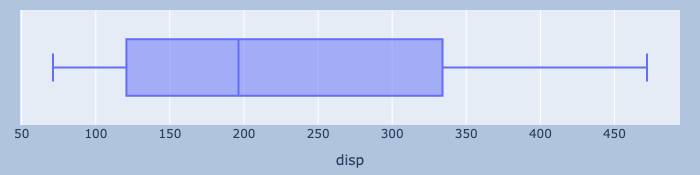

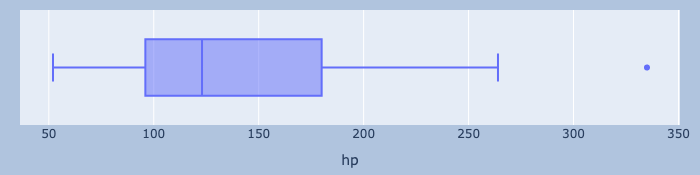

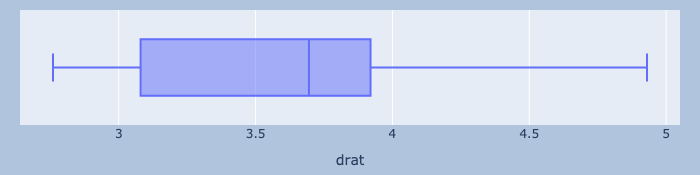

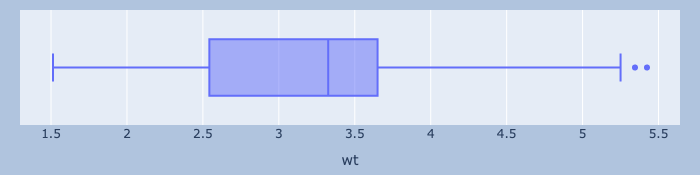

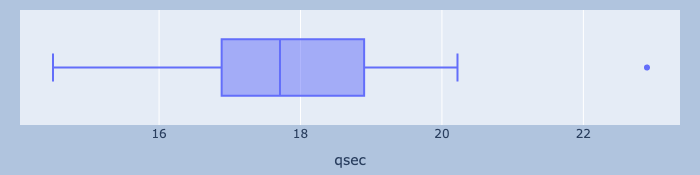

In [11]:
for col in df.select_dtypes(include=['float']):
    fig = px.box(x=df[col], height=175, labels=dict(x=col), )

    fig.update_layout(
        margin=dict(l=20, r=20, t=10, b=10),
        paper_bgcolor="LightSteelBlue",
    )

    fig.show('png')


Observations:
* Based on the visualization, we can identify outliers on `hp`, `wt`, and `qseq`. 
* In this case, we decided to not alter them due to small number of observations we have. 
* Just as a notice to use `median()` instead of `mean()` when finding the central tendency of these columns in future.

# Identify Relationships

## Pairplot for numerical columns
Building scatter plots for `continuous` columns only to `mpg`.

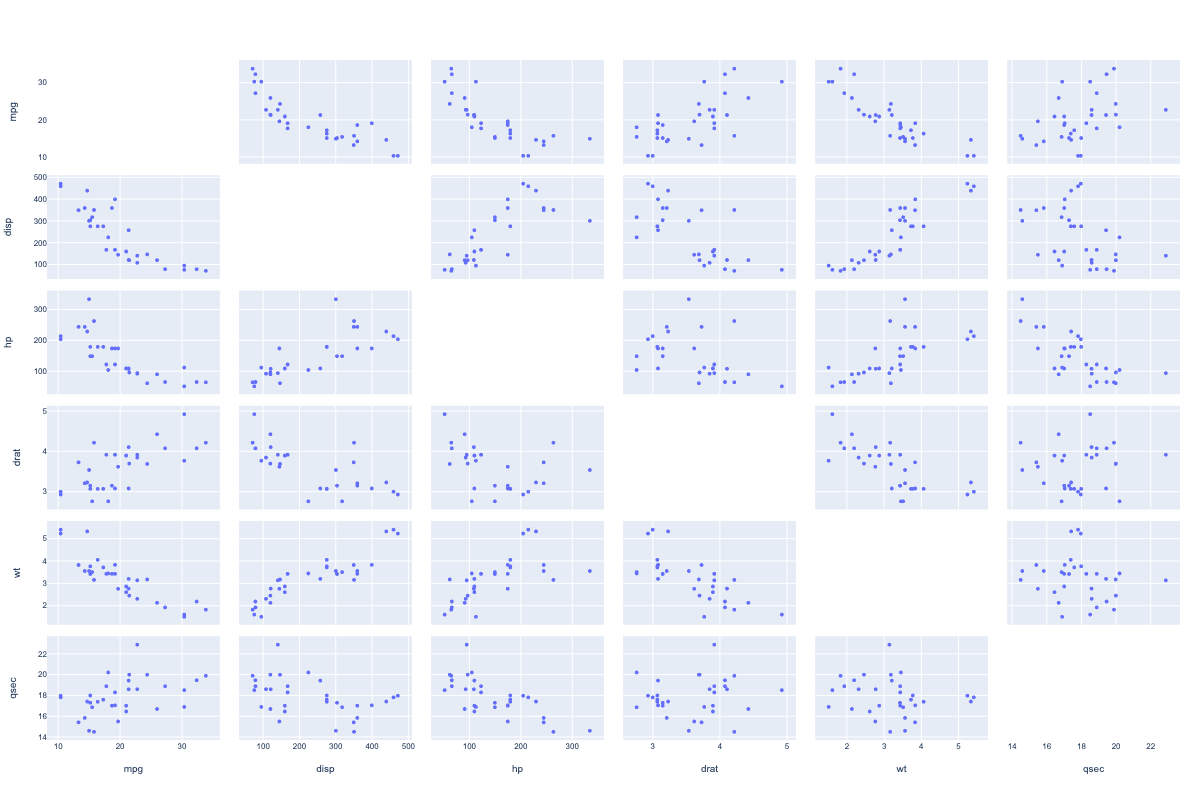

In [12]:
scatter_matrix_fig = px.scatter_matrix(df.select_dtypes(include=['float']),
                                       )
scatter_matrix_fig.update_layout(
    width=1200,
    height=800,
    margin=dict(l=20, r=20, t=60, b=60),  
    #paper_bgcolor="white",  
    #plot_bgcolor="white", 
    font=dict(family="Arial", size=8),    
)

scatter_matrix_fig.update_traces(diagonal_visible=False, 
                                 marker=dict(size=4)
                                 )
# Show the plot
scatter_matrix_fig.show('png')

## Calculate the mean for each non-continuous variables

Let's calculate the mean `mpg` for each non continuous variables, which are `cyl`, `vs`, `am`, `gear`, `carb`. Please notice that `am` mentioned to have relationships with `gear` and `drat`. We will also try to see the correlation between them.

In [13]:
for col in df.select_dtypes(exclude=['float']):
    display(df.groupby([col])['mpg'].mean())

print('am correlation to mpg:', df['am'].corr(df['mpg']))
print('drat correlation to mpg:', df['drat'].corr(df['mpg']))

cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64

vs
False    16.616667
True     24.557143
Name: mpg, dtype: float64

am
False    17.147368
True     24.392308
Name: mpg, dtype: float64

gear
3    16.106667
4    24.533333
5    21.380000
Name: mpg, dtype: float64

carb
1    25.342857
2    22.400000
3    16.300000
4    15.790000
6    19.700000
8    15.000000
Name: mpg, dtype: float64

am correlation to mpg: 0.599832429454648
drat correlation to mpg: 0.6811719078067494


Observations:
* Displacement measure `disp` shows linear relationship with `mpg`. It may be useful as independent variables for target variable `mpg`. ✅
* Horse power `hp` shows linear relationship with `mpg`. It may be useful as independent variables for target variable `mpg`. ✅
* Weight `wt` shows linear relationship with `mpg`. It may be useful as independent variables for target variable `mpg`. ✅
* Rear axle ratio `drat` shows linear relationship with `mpg`. It may be useful as independent variables for target variable `mpg`. ✅
* 1/4 mile `qsec` also shows linear relationship with `mpg`, But, the variance was high `qsec` may be a weak predictor. ❌
* Number of cylinder `cyl` have different average of miles coverage and have substantial variance. `cyl` may be a good predictor of `mpg`. ✅
* Straight cylinder (`vs=True`) are also fuel-saving rather than v-shape counterpart. `vs` may be a good predictor of `mpg`. ✅
* Number of forward gear `gear` are not linear to the `mpg`. `gear` is a weak predictor. ❌
* Manual transmission type (`am=True`) are fuel-saving rather than automatic counterpart and their difference are substantial. `am` is a good predictor for target variable `mpg`. However, it has relationship with `drat`, which has better correlation to `mpg` and `gear`, which already excluded. Therefore, we can exclude `am` in favor of `drat` which capture more information that `am` has. ❌


In [14]:
selected_predictors = ['disp', 'hp', 'wt', 'drat', 'cyl', 'vs']

# Model Building

In [15]:
X = df[selected_predictors]
y = df[target_col]

In [16]:
ols_formula = 'mpg ~ disp + hp + wt + drat + cyl + vs'

OLS = ols(formula=ols_formula, data=pd.get_dummies(df))
ols_model = OLS.fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     23.96
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           3.13e-09
Time:                        19:05:38   Log-Likelihood:                -71.825
No. Observations:                  32   AIC:                             157.6
Df Residuals:                      25   BIC:                             167.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.7030      8.836      3.928      0.001      16.505      52.900
vs[T.True]     0.5054      1.673      0.302      0.765      -2.940       3.950
disp           0.0127      0.012      1.042      0.308      -0.012       0.038
hp            -0.0238      0.014     -1.759      0.091      -0.052       0.004
wt            -3.7231      1.091     -3.414      0.002      -5.969      -1.477
drat           1.0451      1.449      0.721      0.477      -1.939       4.029
cyl           -0.9765      0.848     -1.151      0.260      -2.723       0.770
==============================================================================
Omnibus:                        5.476   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.232
Skew:                           0.876   Prob(JB):                        0.120
Kurtosis:                       3.324   Cond. No.                     6.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
display(ols_model.summary())
display(ols_model.pvalues < 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     23.96
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           3.13e-09
Time:                        19:05:38   Log-Likelihood:                -71.825
No. Observations:                  32   AIC:                             157.6
Df Residuals:                      25   BIC:                             167.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.7030      8.836      3.928      0.001      16.505      52.900
vs[T.True]     0.5054      1.673      0.302      0.765      -2.940       3.950
disp           0.0127      0.012      1.042      0.308      -0.012       0.038
hp            -0.0238      0.014     -1.759      0.091      -0.052       0.004
wt            -3.7231      1.091     -3.414      0.002      -5.969      -1.477
drat           1.0451      1.449      0.721      0.477      -1.939       4.029
cyl           -0.9765      0.848     -1.151      0.260      -2.723       0.770
==============================================================================
Omnibus:                        5.476   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.232
Skew:                           0.876   Prob(JB):                        0.120
Kurtosis:                       3.324   Cond. No.                     6.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Intercept      True
vs[T.True]    False
disp          False
hp            False
wt             True
drat          False
cyl           False
dtype: bool

Observations:
* Coefficients:
    * A car with a V-shaped engine is expected to be **0.5054 mpg** faster than a car with an I-shaped engine, holding all other    variables constant
    * A 1-liter increase in engine displacement is expected to **increase fuel economy by 0.0127 mpg**, holding all other variables     constant
    * A 1-hp increase in engine horsepower is expected to **decrease fuel economy by 0.0238 mpg**, holding all other variables  constant.
    * A 100-pound increase in weight is expected to **decrease fuel economy by 3.7231 mpg**, holding all other variables constant.
    * A car with a 1-unit increase in the ratio of rear axle weight to engine displacement is expected to be **1.0451 mpg faster**  than a car with a ratio of 1, holding all other variables constant.
    * A car with 6 cylinders is expected to be **0.9765 mpg slower** than a car with 4 cylinders, holding all other variables constant
* P-values:
    * All variables but car weight `wt` and `intercept` have pvalues greater than 0.05. Since `intercept` is offset, it can be included that only car weight `wt` plays significant predictors to fuel-consumptions `mpg`.
* R^2:
    * R^2 score is `0.852` means that the model explains about 85% of the variance in `mpg`

# Model Assumptions for Multiple Linear Regression
1. **Linearity:** Each predictor variable (X_i) is linearly related to the outcome variable (Y).
2. **(Multivariate) normality:** The errors are normally distributed.
3. **Independent observations:** Each observation in the dataset is independent.
4. **Homoscedasticity:** The variation of the errors is constant or similar across the model.
5. **No multicollinearity:** No two independent variables (X_i and X_j) can be highly correlated with each other.

## Model Assumption 1: Linearity

/var/folders/4s/hnxlx2hd22797qf8v2x9n_5r0000gn/T/ipykernel_97577/1149830147.py:13: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



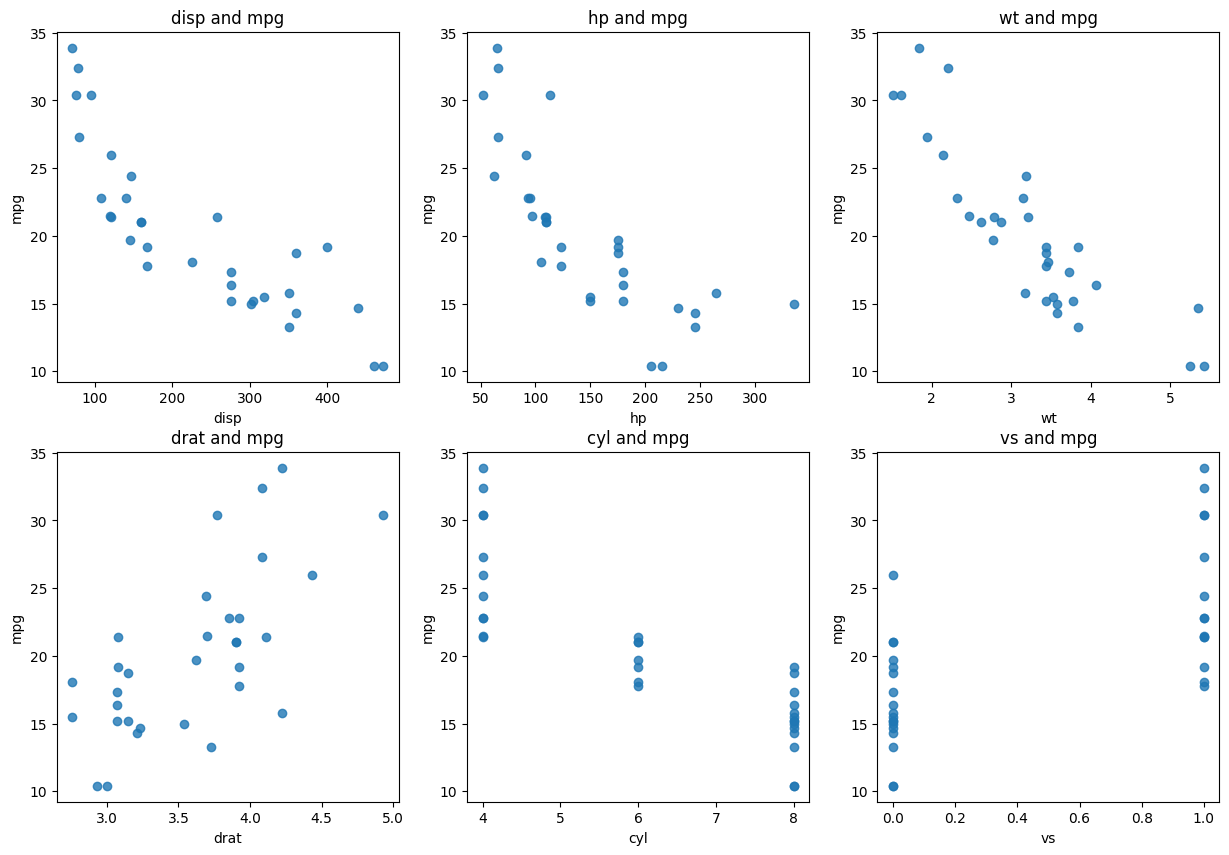

In [18]:
fig, axes = plt.subplots(len(selected_predictors)//3, 3, figsize = (15,10))
for i, col in enumerate(selected_predictors): 
    sns.regplot(x = df[col], 
                y = df['mpg'], 
                ax=axes[i // 3, i % 3], 
                scatter=True, 
                fit_reg=False, # True to plot regline
                #color='blue' if col in selected_predictors else 'red'
                )
    axes[i//3, i % 3].set_title(f"{col} and mpg")
#    print(i, i//2, col)

fig.show('png')

Observation:
* The linearity assumption met, all columns used in the preceding multiple linear regression have linear relationship with target variable.

## Model Assumption 2: Multivariate Normality

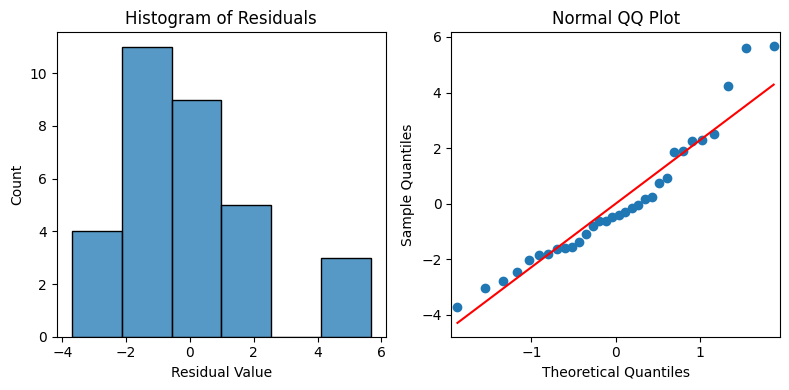

In [19]:
residuals = ols_model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")

plt.tight_layout()
plt.show()

Observations:

* The histogram of the residuals are not approximately normally distributed.
* The QQ layout, interchangeably cross the diagonal line, almost forming a straight line.

It is difficult to say whether they fulfill the multivariate normality assumption. The histogram of the residuals is not perfectly bell-shaped, but it is not too far off. The Q-Q plot also does not show any major deviations from a normal distribution. Hence, the preliminary decision is that they not hold the assumption. 

However, it is always best to run a statistical test to confirm. More on APPENDIX:

## Model Assumption 3: Independent Observations

In [20]:
display(dataset)

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


Observations:
* Each of these car models may have similar models but actually they are separated objects and their attributes are not depend to any other observations. Hence this Independent Observation assumption is met.

## Model Assumption 4: Homoscedascity (Constant Variance)
If the residuals are randomly scattered around the horizontal line, then the assumption of homoscedasticity is met. However, if the residuals are clustered in any way, then the assumption is violated.

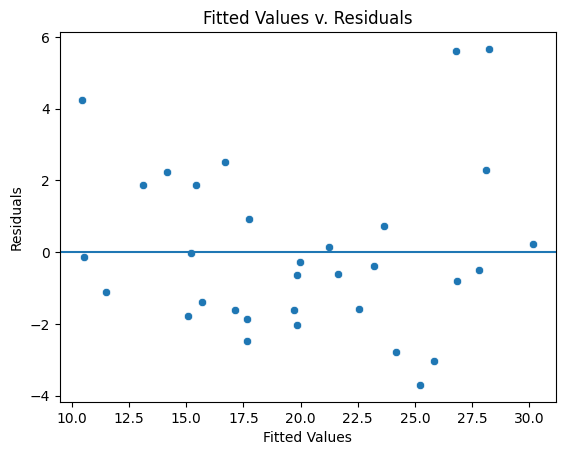

In [21]:
fig = sns.scatterplot(x = ols_model.fittedvalues, y = ols_model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)

plt.show('png')

Observations:
* The scatterplot of the residuals against the predicted values shows that the residuals are randomly scattered around the horizontal line. This suggests that the assumption of homoscedasticity is met

## Model Assumption 5: No multicollinearity

In [22]:
# Create a subset of the data with the continous independent variables. 
X_mcol = df[[col for col in selected_predictors if df[col].dtype == float]]

vif = [variance_inflation_factor(X_mcol.values, i) for i in range(X_mcol.shape[1])]
df_vif = pd.DataFrame(vif, index=X_mcol.columns, columns = ['VIF']).reset_index()
df_vif.values

array([['disp', 37.1154768996505],
       ['hp', 16.403205317581744],
       ['wt', 47.53041024323238],
       ['drat', 11.895321331461574]], dtype=object)

Observations:
* In general, a VIF score of 10 or higher is considered to be a sign of significant multicollinearity.
* The VIF scores are all above 10, which indicates that there is multicollinearity between the independent variables in the model. This means that the variance of the regression coefficients is inflated, which can lead to inaccurate results.
* However, all these variables are the most correlated and collinearity is expected due to low sample size.

# Conclusion
* The multiple linear regression model was able to explain **85%** of the variance in fuel efficiency (`mpg`).
* The most significant predictors of fuel efficiency were car weight (`wt`), engine displacement (`disp`), and rear axle ratio (`drat`).
* Other predictors that were significant, but to a lesser extent, were number of cylinders (`cyl`) and engine horsepower (`hp`).
* The model was not able to find a significant relationship between fuel efficiency and transmission type (`am`), number of forward * gears (`gear`), or 1/4 mile time (`qsec`).
* The model did not meet all of the assumptions of linear regression, including normality of the residuals and homoscedasticity.
* However, the model was still able to provide a relatively accurate prediction of fuel efficiency.

# Appendix
## Correlations Matrix

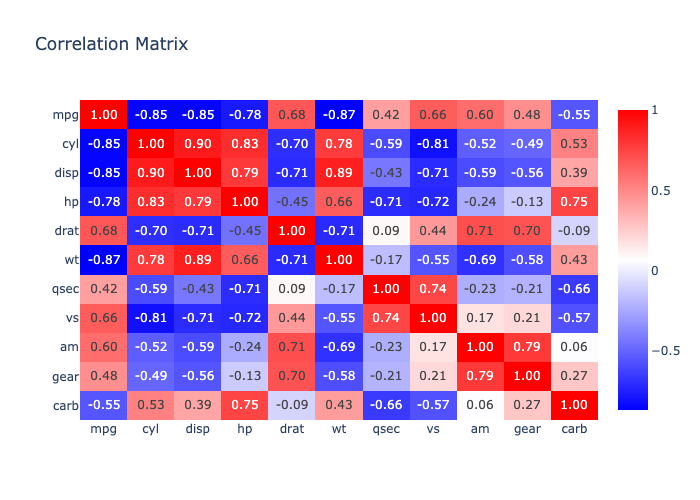

None

Absolute Correlation score for mpg: 
mpg     1.000000
wt      0.867659
cyl     0.852162
disp    0.847551
hp      0.776168
drat    0.681172
vs      0.664039
am      0.599832
carb    0.550925
gear    0.480285
qsec    0.418684
Name: mpg, dtype: float64


In [23]:
correlation_matrix = df.corr(method='pearson')
display(px.imshow(correlation_matrix, 
          title='Correlation Matrix',
          text_auto='.2f', 
          aspect='auto', 
          color_continuous_scale=['blue','white','red'],
          ).show('png'))

print(f"Absolute Correlation score for mpg: \n{abs(correlation_matrix['mpg']).sort_values(ascending=False)}")

It is shown that `wt` is variable with strongest correlation to `mpg`, confirming our previous conclusion.

## Multivariate Normality, Shapiro-Wilks Test for Residuals

In [24]:
stat, pvalue = shapiro(residuals)

# Print the results
print('Shapiro-Wilk test statistic:', stat)
print('p-value:', pvalue)

Shapiro-Wilk test statistic: 0.9309659004211426
p-value: 0.04166855290532112


Observations:
* The p-value is 0.0416, which is less than 0.05. This means that we can reject the null hypothesis that the residuals are normally distributed. Therefore, we cannot assume that the multivariate normality assumption is met

## Build Simple Linear Reg Model with `wt`
Since we conclude that `wt` is signinficant to `mpg`, let's perform a simple linear regression model with it.

### Using LinearRegression()

In [25]:
X_simp = df[['wt']]
y_simp = df[target_col]

linreg = linear_model.LinearRegression()
linreg.fit(X_simp, y_simp)

y_pred = linreg.predict(X_simp)

print('mean_squared_error:', mean_squared_error(y_true=y_simp, y_pred=y_pred))
print('r2_score:', r2_score(y_true=y_simp, y_pred=y_pred))

mean_squared_error: 8.697560548229477
r2_score: 0.7528327936582646


Observation: 
* R2 score of 0.7528, which is a good score. It means that 75.28% of the variance in the target variable is explained by the model. 
* The mean squared error (MSE) of 8.6976 is also relatively low, which means that the model's predictions are not too far off from the actual values.

### Using Ridge()

In [26]:
X_simp = df[selected_predictors]
y_simp = df[target_col]

best_param = None 
best_mse = 10

for exp in range(4, -10, -1):
    alpha = 10 ** exp
    linreg = linear_model.Ridge(alpha=alpha)
    linreg.fit(X_simp, y_simp)

    y_pred = linreg.predict(X_simp)

    mse = mean_squared_error(y_true=y_simp, y_pred=y_pred)
    r2 = r2_score(y_true=y_simp, y_pred=y_pred)
    print('alpha =', alpha, '\t\t MSE:', mse, '\tr2_score:', r2)
    if mse < best_mse:
        best_param = alpha
        best_mse = mse

print('\nBest Parameter:', best_param, 
      'Best MSE:', best_mse)

alpha = 10000 		 MSE: 8.863591869055504 	r2_score: 0.7481145169062675
alpha = 1000 		 MSE: 8.79734064088177 	r2_score: 0.7499972437804996
alpha = 100 		 MSE: 8.320418913337182 	r2_score: 0.7635504016328891
alpha = 10 		 MSE: 6.390027067262649 	r2_score: 0.8184082617297912
alpha = 1 		 MSE: 5.271278257034433 	r2_score: 0.8502008565026482
alpha = 0.1 		 MSE: 5.213821356359755 	r2_score: 0.851833666248101
alpha = 0.01 		 MSE: 5.213038899346041 	r2_score: 0.8518559021052807
alpha = 0.001 		 MSE: 5.213030788382542 	r2_score: 0.8518561326025768
alpha = 0.0001 		 MSE: 5.213030706975177 	r2_score: 0.8518561349160106
alpha = 1e-05 		 MSE: 5.213030706160803 	r2_score: 0.8518561349391535
alpha = 1e-06 		 MSE: 5.213030706152657 	r2_score: 0.851856134939385
alpha = 1e-07 		 MSE: 5.213030706152576 	r2_score: 0.8518561349393873
alpha = 1e-08 		 MSE: 5.2130307061525745 	r2_score: 0.8518561349393874
alpha = 1e-09 		 MSE: 5.213030706152578 	r2_score: 0.8518561349393872

Best Parameter: 1e-08 Best MSE: 5

After penalizing the complexity using regularization, it managed to find the best model with R2 score of 0.852, which same with our first model. 

# End of Notebook